In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# Загрузка данных

In [2]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [ ]:
data = pd.read_excel('data/data_ford_price.xlsx')

# Трансформация признаков

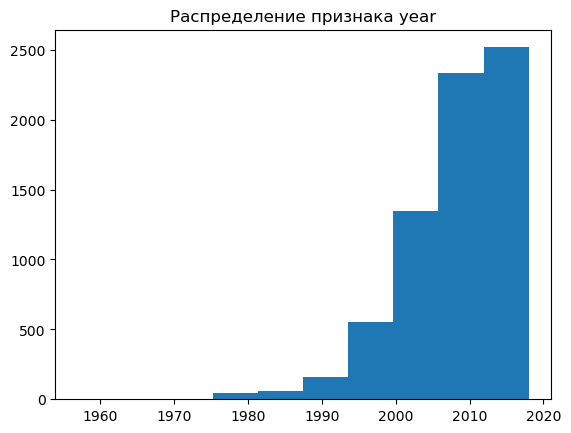

In [4]:
plt.hist(data.year)
plt.title('Распределение признака year');

## Квантильное преобразование

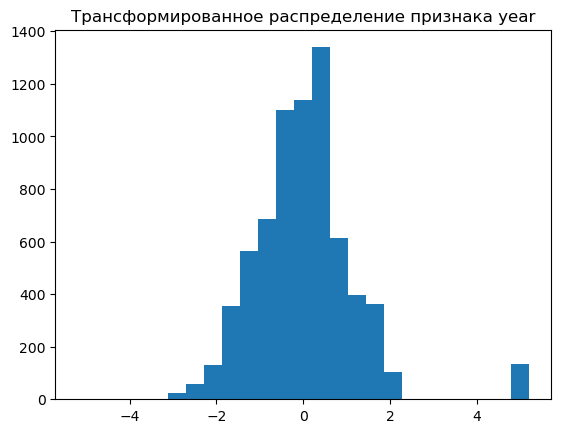

In [ ]:
# Данный трансформер принимает на вход 2D-массив, поэтому нам надо изменить формат данных (поскольку мы подаём на вход только один столбец)
data_for_transform = data['year'].values.reshape((len(data),1))

quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)

plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

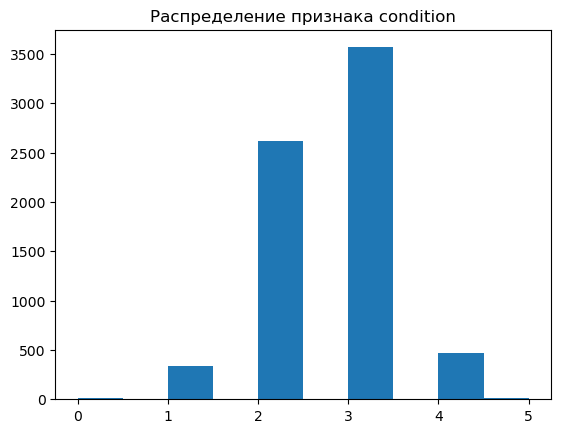

In [6]:
plt.hist(data.condition)
plt.title('Распределение признака condition');

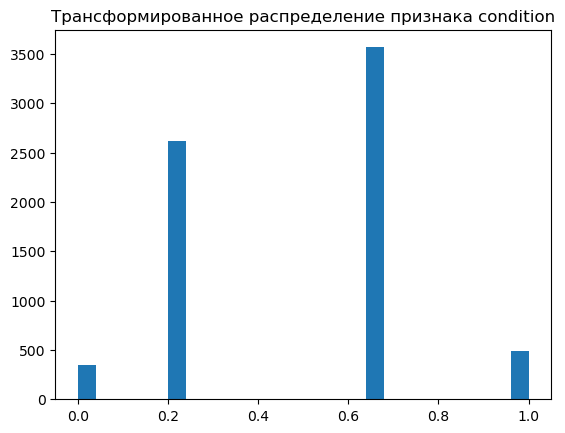

In [ ]:
data_for_transform = data['condition'].values.reshape((len(data),1))

quantile = QuantileTransformer(output_distribution='uniform')
data_transformed = quantile.fit_transform(data_for_transform)

plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака condition')
plt.show()

In [14]:
print(data_transformed[0])

[0.96396396]


In [17]:
import math
result = math.log(100000, 10)  # log₂(8)
print(result)  # 3.0

5.0


## Логарифмическое преобразование

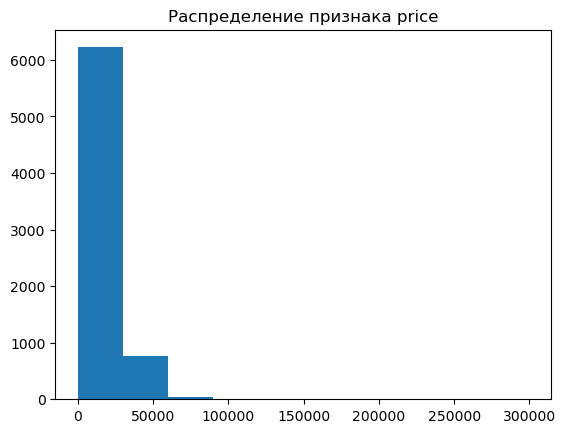

In [18]:
plt.hist(data.price)
plt.title('Распределение признака price');

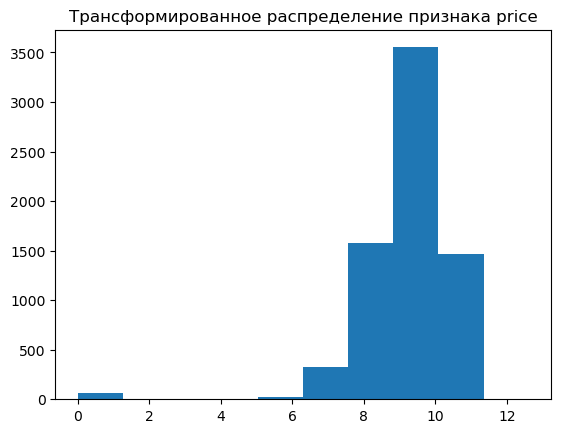

In [ ]:
log_price = np.log(data['price'])

plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

In [ ]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis = 1)

price_data.describe()

,price,transformed_price
count,7017.000000,7017.000000
mean,15121.549523,9.204510
std,11765.423119,1.275868
min,1.000000,0.000000
25%,5995.000000,8.698681
50%,12750.000000,9.453287
75%,21995.000000,9.998570
max,299500.000000,12.609870


In [22]:
print(price_data.tail())

      price  transformed_price
7012  22500          10.021271
7013   5975           8.695339
7014   9999           9.210240
7015  10900           9.296518
7016  18000           9.798127


Стоит учесть, что, если наши данные имеют отрицательные значения или значения в диапазоне от 0 до 1, мы не можем применить логарифмическое преобразование напрямую, поскольку логарифм отрицательных чисел и 0 не определён, то есть мы получим ошибки или значения NaN в наших данных. В таких случаях мы можем добавить число к этим значениям, чтобы все они были больше 1.

## Преобразование Бокса-Кокса
 которое работает для положительных значений признака.

In [26]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer

# Предположим, что data — это DataFrame с колонками 'price' и 'year'
# Проверим наличие и корректность данных
if 'price' not in data.columns or 'year' not in data.columns:
    raise ValueError("В DataFrame отсутствуют колонки 'price' и 'year'")

# Проверим, есть ли отрицательные значения или нули
if (data[['price', 'year']] <= 0).any().any():
    raise ValueError("Для применения Box-Cox все значения должны быть положительными")

# Преобразование с помощью PowerTransformer
box_cox = PowerTransformer(method='box-cox')

# Создадим копию ДФ для проеобразования boxcox scipy
test_data_year = data.copy()

from scipy.stats import boxcox

data_box_cox_price = box_cox.fit_transform(data[['price']].values)

data_box_cox_year,  = boxcox(test_data_year['year'])

# Создадим DataFrame с преобразованными данными
data_box_cox_price = pd.DataFrame(data_box_cox_price, columns=['transformed_price'])
data_box_cox_year = pd.DataFrame(data_box_cox_year, columns=['transformed_year'])

data_box_cox = pd.concat([data_box_cox_price, data_box_cox_year], axis=1)

c:\myProgram\Python\anaconda3\envs\myConda_env_312\Lib\site-packages\scipy\stats\_morestats.py:1120: UserWarning: The optimal lambda is 123.77781881071438, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in <class 'numpy.float64'>.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)


ValueError: too many values to unpack (expected 1)

c:\myProgram\Python\anaconda3\envs\myConda_env_312\Lib\site-packages\matplotlib\axes\_axes.py:6973: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\myProgram\Python\anaconda3\envs\myConda_env_312\Lib\site-packages\matplotlib\axes\_axes.py:6974: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

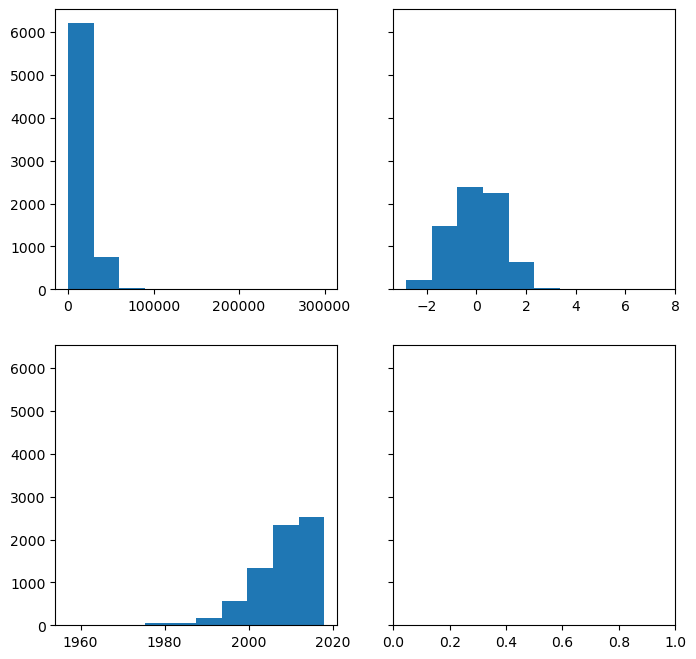

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True)
axs[0][0].hist(data['price'])
axs[1][0].hist(data['year'])
axs[0][1].hist(data_box_cox['transformed_price'])
axs[1][1].hist(data_box_cox['transformed_year'])

axs[0][0].set(title='price')
axs[0][1].set(title='box cox price')

axs[1][0].set(title='year')
axs[1][1].set(title='box cox year')

fig.suptitle('Сравнение распределений до трансформации и после')

plt.show()